In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import rc
import matplotlib
matplotlib.matplotlib_fname()


'//anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [2]:
compounds = np.array([r'$Cs_2SnI_6$',r'$Rb_2SnI_6$', r'$Cs_2PdI_6$',r'$Cs_2PtI_6$',r'$Rb_2PtI_6$',r'$K_2PtI_6$',r'$Cs_2TeI_6$'])
Eg_PBE_cubic = np.array([0.2883, 0.1534, 0.1536, 0.6561, 0.5144, 0.4242, 1.5068])
Eg_PBE_tetra = np.array([0.3674, 0.6714, 0.1279, 0.6174, 0.7456, 0.9131, 1.4475])
Eg_HSE_cubic = np.array([1.172, 1.0215, 0.8587, 1.472, 1.3036, 1.1957, 2.1872])
Eg_HSE_tetra = np.array([1.2167, 1.51, 0.85, 1.4634, 1.5741, 1.6492, 2.0804])
Eg_exp = np.array([1.24, 1.33, 1000, 1000, 1000, 1000, 1000]) #from Yan Chen
comp = np.arange(len(compounds))

In [3]:
mask = np.array([1, 1, 1, 1, 1, 0, 1])
Eg_exp_masked = np.ma.masked_array(Eg_exp, Eg_exp == 1000)
Eg_PBE_cubic_masked = np.ma.masked_array(Eg_PBE_cubic, mask == 0)
Eg_PBE_tetra_masked = np.ma.masked_array(Eg_PBE_tetra, mask == 1)
Eg_HSE_cubic_masked = np.ma.masked_array(Eg_HSE_cubic, mask == 0)
Eg_HSE_tetra_masked = np.ma.masked_array(Eg_HSE_tetra, mask == 1)
PBE_mixed=np.array([0.2883, 0.1534, 0.1536, 0.6561, 0.5144, 0.9131, 1.5068])
HSE_mixed=np.array([1.172, 1.0215, 0.8587, 1.472, 1.3036, 1.6492, 2.1872])

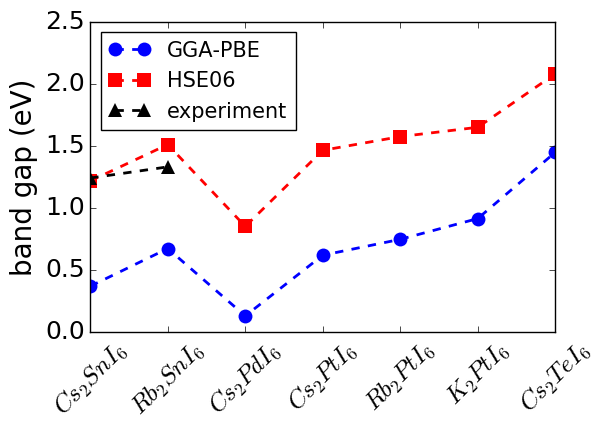

In [4]:
#old plot
fig, ax = plt.subplots()
#ax.plot(comp, Eg_PBE_cubic,'-o', color='r', ms = 10, mew = 0, lw=2, label ='GGA-PBE cubic')
ax.plot(comp, Eg_PBE_tetra,'--o', color='b', ms = 10, mew = 0, lw=2, label ='GGA-PBE')
#ax.plot(comp, Eg_HSE_cubic,'-o', color='b', ms = 10, mew = 0, lw=2, label ='HSE06 cubic')
ax.plot(comp, Eg_HSE_tetra,'--s',color='r', ms = 10, mew = 0, lw=2, label ='HSE06')
ax.plot(comp, Eg_exp_masked,'--^', color='k', ms = 10, mew = 0, lw=2, label ='experiment')

plt.xticks(np.arange(7), compounds, fontsize = 18, rotation=45)
plt.yticks(np.arange(0, 3.0, 0.5), fontsize = 18)
ax.set_ylabel('band gap (eV)', fontsize = 20)
ax.legend(loc='upper left', fontsize = 15)
plt.show()

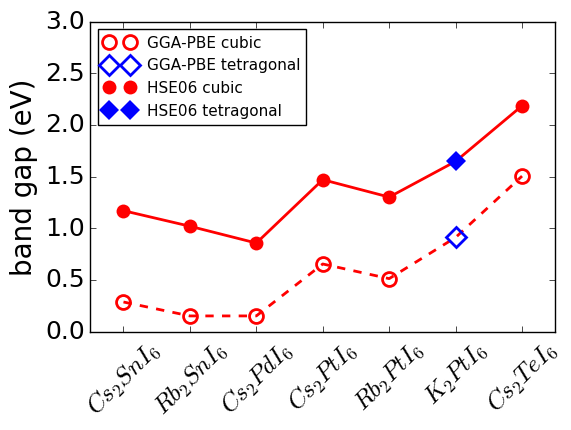

In [5]:
fig, ax = plt.subplots()
ax.plot(comp, PBE_mixed, '--', color='r', lw=2)
ax.plot(comp, HSE_mixed, '-', color='r', lw=2)
ax.plot(comp, Eg_PBE_cubic_masked,'o', mec='r', mfc='None', ms = 10, mew = 2, lw=2, label ='GGA-PBE cubic')
ax.plot(comp, Eg_PBE_tetra_masked,'D', mec='b', mfc='None', ms = 10, mew = 2, lw=2, label ='GGA-PBE tetragonal')
ax.plot(comp, Eg_HSE_cubic_masked,'o', color='r', ms = 10, mew = 0, lw=2, label ='HSE06 cubic')
ax.plot(comp, Eg_HSE_tetra_masked,'D',color='b', ms = 10, mew = 0, lw=2, label ='HSE06 tetragonal')
#ax.plot(comp, Eg_exp_masked, '^', color='k', ms = 10, mew = 0, lw=2, label ='experiment')
#ax.plot(0, 1.6, '^', color='k',  ms = 10, label ='experiment')
#ax.plot(0, 1.48, '^', color='k',  ms = 10)
#ax.plot(0, 1.3, '^', color='k',  ms = 10)
#ax.plot(6, 1.5, '^', color='k',  ms = 10)
#ax.plot(6, 1.59, '^', color='k',  ms = 10)
plt.xticks(np.arange(7), compounds, fontsize = 18, rotation=45)
plt.yticks(np.arange(0, 3.1, 0.5), fontsize = 18)
ax.set_xlim(-0.5,6.5)
ax.set_ylabel('band gap (eV)', fontsize = 20)
ax.legend(loc='upper left', fontsize = 11)
plt.savefig('/Users/yao/Desktop/216-figure/pbe-hse-gap.jpg', dpi=600, bbox_inches='tight')
plt.show()
